In [1]:
import os
import json
from dataclasses import asdict
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Image
from protocol import Env,Message
from agents import Group
from agent import Agent

 
[2024-12-11 17:16:41][INFO]: All agents are fully connected
 
[2024-12-11 17:16:41][INFO]: Create a default manager for the group


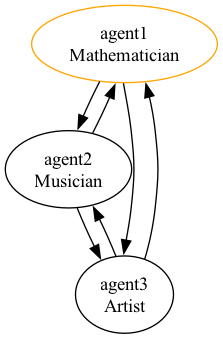

In [2]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name="agent1", 
              role="Mathematician", 
              description="Transfer to me if you need help with math.", 
              dify_access_token=os.environ.get("AGENT1_ACCESS_TOKEN"),
              verbose=True),

        Agent(name="agent2", 
              role="Musician", 
              description="Transfer to me if you need help with music.", 
              dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN"),
              verbose=True),

        Agent(name="agent3", 
              role="Artist", 
              description="Transfer to me if you need help with art.",
              model_client=model_client,
              verbose=True),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True,manager=True)

Image(g.draw_relations())

In [3]:
g.update_group_messages([Message(sender="user", action="talk", result="Can anyone help me with math? 2+2=?"),
                         Message(sender="agent1", action="solve", result="2+2=4"),
                         Message(sender="user", action="talk", result="Can anyone help me with music?")
                        ])

In [4]:
# Do handoff
# After handoff the current agent will be updated to the one who will speak next
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

# Print the group message protocol instance
print('-'*50)
print("Below Is The Group Message Protocol Instance")
print('-'*50)
print(json.dumps(asdict(g.group_messages), indent=4))
# print('-'*50)
# print("Below Message Send To `{}` who is {}".format(g.current_agent,g.members_map[g.current_agent].role))
# print('-'*50)
# print(g._build_send_message(g.group_messages,cut_off=3,send_to=g.current_agent))

 
[2024-12-11 17:16:47][INFO]: handoff from agent1 to agent2 by using auto2 mode
--------------------------------------------------
Below Is The Group Message Protocol Instance
--------------------------------------------------
{
    "group_id": "dd493624-586e-4087-bf0e-5052cbe92bcd",
    "env": {
        "description": "This is a test environment",
        "members": [
            {
                "name": "agent1",
                "role": "Mathematician",
                "description": "Transfer to me if you need help with math."
            },
            {
                "name": "agent2",
                "role": "Musician",
                "description": "Transfer to me if you need help with music."
            },
            {
                "name": "agent3",
                "role": "Artist",
                "description": "Transfer to me if you need help with art."
            }
        ],
        "relationships": {
            "agent1": [
                "agent2",
            

In [5]:
g.user_input("How about music for reading?")
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

 
[2024-12-11 17:16:50][INFO]: User input (talk): How about music for reading?
 
[2024-12-11 17:16:51][INFO]: Calling Dify agent [agent2]
 
[2024-12-11 17:16:58][INFO]: Agent agent2 response: If you're looking for music that complements reading, I can certainly help! Music for reading typically needs to be calm and not overly distracting. Here are a few suggestions:

1. **Classical Music**: Compositions by composers like Johann Sebastian Bach or Claude Debussy can create a serene atmosphere. Bach's "Goldberg Variations" or Debussy's "Clair de Lune" are great choices that can enhance focus without overwhelming your thoughts.

2. **Ambient Music**: Artists like Brian Eno, particularly his album "Music for Airports," provide a tranquil soundscape that can help you concentrate on your reading. Ambient music is designed to be background sound, making it perfect for such activities.

3. **Instrumental Jazz**: Soft jazz, like the works of Bill Evans or Miles Davis, can add a sophisticated tou

In [6]:
g.user_input("Let's discuss what is beauty.")
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")
_ = g.call_agent(agent="agent1",model="gpt-4o-mini")

 
[2024-12-11 17:17:01][INFO]: User input (talk): Let's discuss what is beauty.
 
[2024-12-11 17:17:02][INFO]: handoff from agent2 to agent3 by using auto2 mode
 
[2024-12-11 17:17:03][INFO]: Calling OpenAI agent [agent3]
 
[2024-12-11 17:17:05][INFO]: Agent agent3 response: Beauty is a deeply subjective concept that varies across cultures, societies, and individual experiences. In art, beauty often encompasses harmony, balance, and aesthetic appeal, drawing the viewer in through emotion or provocation.

From my perspective as an artist, beauty can exist in both the intricate details and the abstract representations of our world. It can be found in nature's forms, the play of light and shadow, and the emotions conveyed through color and composition. Furthermore, beauty need not adhere to traditional standards; unconventional or raw expressions can be profoundly beautiful in their authenticity and ability to elicit a visceral reaction.

What do you think? How do you perceive beauty in a

In [7]:
g.user_input("Can you summarize the discussion?")
_ = g.call_manager(model="gpt-4o-mini",message_cut_off=5)

 
[2024-12-11 17:17:52][INFO]: User input (talk): Can you summarize the discussion?
 
[2024-12-11 17:17:52][INFO]: Calling OpenAI agent [GroupManager-dd493624-586e-4087-bf0e-5052cbe92bcd]
 
[2024-12-11 17:17:56][INFO]: Call manager GroupManager-dd493624-586e-4087-bf0e-5052cbe92bcd
 
[2024-12-11 17:17:56][INFO]: Manager GroupManager-dd493624-586e-4087-bf0e-5052cbe92bcd response: Certainly! The discussion has revolved around the concept of beauty as it relates to both art and mathematics, with agent3 (the Artist) and agent1 (the Mathematician) exploring their perspectives.

1. **Subjectivity of Beauty**: Agent3 emphasized that beauty is subjective and varies across cultures and individual experiences. They noted that beauty can be found in intricate details and abstract representations, evoking emotions and authenticity.

2. **Mathematical Elegance**: Agent1 brought in the idea that beauty in mathematics lies in the elegance of solutions and the connection between different concepts. The

## Add and Delete Member Dynamicly 

Like people come and go in some place or some group

 
[2024-12-11 17:21:36][INFO]: Self-defined relationships


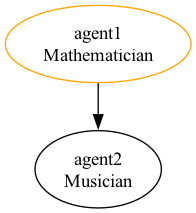

In [16]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name="agent1", 
              role="Mathematician",
              description="Transfer to me if you need help with math.", 
              dify_access_token=os.environ.get("AGENT1_ACCESS_TOKEN")),
              
        Agent(name="agent2", 
              role="Musician", 
              description="Transfer to me if you need help with music.", 
              dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN"))
    ],
    relationships={"agent1": ["agent2"]}
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

 
[2024-12-11 17:21:36][INFO]: Self-defined relationships
 
[2024-12-11 17:21:36][INFO]: Succesfully add member agent3
 
[2024-12-11 17:21:36][INFO]: Self-defined relationships
 
[2024-12-11 17:21:36][INFO]: Succesfully add member agent4


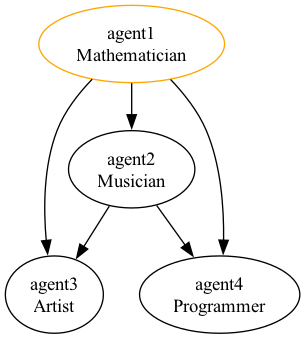

In [17]:
g.add_member(
    member=Agent(
        name="agent3", 
        role="Artist",
        description="Transfer to me if you need help with art.", 
        dify_access_token=os.environ.get("AGENT3_ACCESS_TOKEN")
    ),
    relation=[("agent1", "agent3"), ("agent2", "agent3")]
)

g.add_member(
    member = Agent(
        name="agent4", 
        role="Programmer",
        description="Transfer to me if you need help with programming.", 
        model_client=model_client
    ),
    relation=[("agent1", "agent4"), ("agent2", "agent4")]
)

Image(g.draw_relations())

 
[2024-12-11 17:21:37][INFO]: Self-defined relationships
 
[2024-12-11 17:21:37][INFO]: Successfully delete member agent2


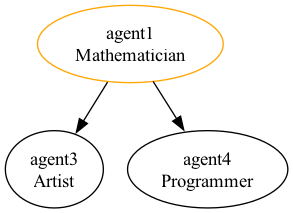

In [18]:
g.delete_member("agent2")
Image(g.draw_relations())

 
[2024-12-11 17:21:37][INFO]: User input (talk): can you recommend me a art work?
 
[2024-12-11 17:21:38][INFO]: handoff from agent1 to agent3 by using auto2 mode


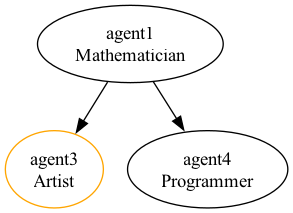

In [19]:

g.user_input("can you recommend me a art work?")
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")
Image(g.draw_relations())

 
[2024-12-11 17:21:39][INFO]: Self-defined relationships
 
[2024-12-11 17:21:39][INFO]: Succesfully add member agent5


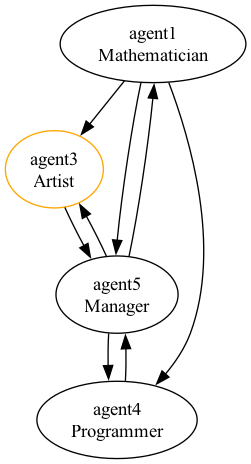

In [20]:
g.add_member(
        member = Agent(
            name="agent5",
            role="Manager",
            description="Transfer to me if you don't know who to transfer to.", 
            model_client=model_client
            ),
        relation = [("agent3","agent5"),("agent5","agent1"),("agent5","agent3"),("agent5","agent4"),("agent4","agent5"),("agent1","agent5")]
    )
Image(g.draw_relations())

 
[2024-12-11 17:21:41][INFO]: User input (talk): can you help me with math?
 
[2024-12-11 17:21:42][INFO]: handoff from agent3 to agent5 by using auto2 mode
 
[2024-12-11 17:21:46][INFO]: handoff from agent5 to agent1 by using auto2 mode


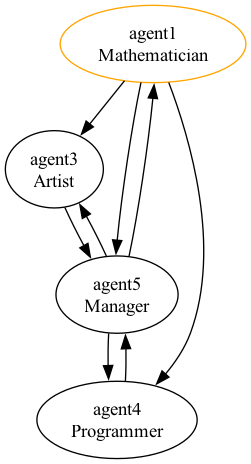

In [21]:

g.user_input("can you help me with math?")
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")
Image(g.draw_relations())

## Task

In [22]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# tools
def get_my_mood():
    """Get the mood of user."""
    return "I am so happy today!"

def get_current_time():
    """Get the current time."""
    return "It is 12:00 PM now."

def get_weather():
    """ Get the weather."""
    return "It is sunny today."

# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name = "agent1",
              role = "Personal Assistant", 
              description = "Transfer to me if you need help with personal stuff.",
              model_client = model_client,
              tools = [get_my_mood,get_current_time,get_weather],
              verbose = True),

        Agent(name="agent2", 
              role="Musician", 
              description="Transfer to me if you need help with music.", 
              dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN"),
              verbose=True)
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True,manager=True)

 
[2024-12-11 17:21:50][INFO]: All agents are fully connected
 
[2024-12-11 17:21:50][INFO]: Create a default manager for the group


In [23]:
task = "What type of music would be suitable for the current weather and my mood today, keeping in mind that I enjoy pop music?"
_ = g.task(task,model="gpt-4o-mini",strategy="sequential")

 
[2024-12-11 17:21:54][INFO]: User input (task): What type of music would be suitable for the current weather and my mood today, keeping in mind that I enjoy pop music?
 
[2024-12-11 17:21:54][INFO]: Start task: What type of music would be suitable for the current weather and my mood today, keeping in mind that I enjoy pop music?
 
[2024-12-11 17:21:54][INFO]: ===> Step 1 for agent1
 
[2024-12-11 17:21:54][INFO]: manually set the current agent to agent1
 
[2024-12-11 17:21:54][INFO]: Calling OpenAI agent [agent1]
 
[2024-12-11 17:22:01][INFO]: Agent agent1 response: By using the tool 'get_my_mood' with the arguments {}, the result is 'I am so happy today!'.
 
[2024-12-11 17:22:01][INFO]: Agent agent1 response: By using the tool 'get_weather' with the arguments {}, the result is 'It is sunny today.'.
 
[2024-12-11 17:22:01][INFO]: Agent agent1 response: Since you're feeling happy and it's sunny outside, a great choice of music would be upbeat pop tracks that match that joyful vibe. Som

In [25]:
task = "What type of music would be suitable for the current weather and my mood today, keeping in mind that I enjoy pop music?"
_ = g.task(task,model="gpt-4o-mini",strategy="auto")

 
[2024-12-11 17:23:01][INFO]: Start task: What type of music would be suitable for the current weather and my mood today, keeping in mind that I enjoy pop music?
 
[2024-12-11 17:23:01][INFO]: User input (task): Use the tool 'get_my_mood' to determine the current mood.
 
[2024-12-11 17:23:01][INFO]: ===> Step 1 for agent1
 
[2024-12-11 17:23:01][INFO]: manually set the current agent to agent1
 
[2024-12-11 17:23:01][INFO]: Calling OpenAI agent [agent1]
 
[2024-12-11 17:23:03][INFO]: Agent agent1 response: By using the tool 'get_my_mood' with the arguments {}, the result is 'I am so happy today!'.
 
[2024-12-11 17:23:03][INFO]: Agent agent1 response: That's great to hear! It sounds like you're in a fantastic mood. Is there anything specific you'd like to do today or any plans you'd like to share?
 
[2024-12-11 17:23:03][INFO]: User input (task): Use the tool 'get_weather' to get the current weather.
 
[2024-12-11 17:23:03][INFO]: ===> Step 2 for agent1
 
[2024-12-11 17:23:03][INFO]: ma

__main__.Tasks